# Simulating Wave Overtopping

Example of simulating wave overtopping flow along a dike crest and landward slope.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from boreflow import BCOvertopping, Geometry, Simulation

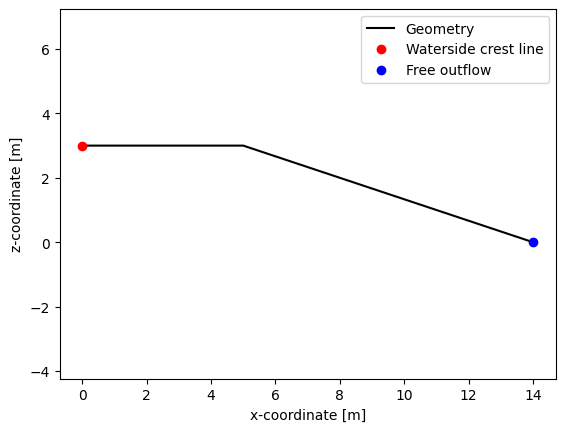

In [3]:
# 1) Create geometry
x = np.array([0, 5, 14])  # X-coordinate x[i]
z = np.array([3, 3, 0])  # Elevation z[i] at x[i]
n = np.array([0.0175, 0.0175])  # Manning roughness (n) between x[i] and x[i+1]
geometry = Geometry(x, z, n)

# Plot the geometry
plt.figure()
plt.plot(x, z, color="black", label="Geometry")
plt.plot([x[0]], [z[0]], "o", color="red", label="Waterside crest line")
plt.plot([x[-1]], [z[-1]], "o", color="blue", label="Free outflow")
plt.legend()
plt.xlabel("x-coordinate [m]")
plt.ylabel("z-coordinate [m]")
plt.axis("equal")
plt.show()

In [11]:
# 2) Create boundary conditions for V = 1.0 m3/m
bc = BCOvertopping(volume=1.0, cota=3)  # cota of the waterside slope

# 3) Initialize simulation settings
sim = Simulation(t_end=10.0, cfl=0.2, max_dt=0.01, nx=140)  # nx = 140 give dx = 0.1m

# 4) Run the simulation
results = sim.run(geometry, bc)

Simulating: 100%|██████████| 10.00/10.00 s

Simulation done in 31.63 sec


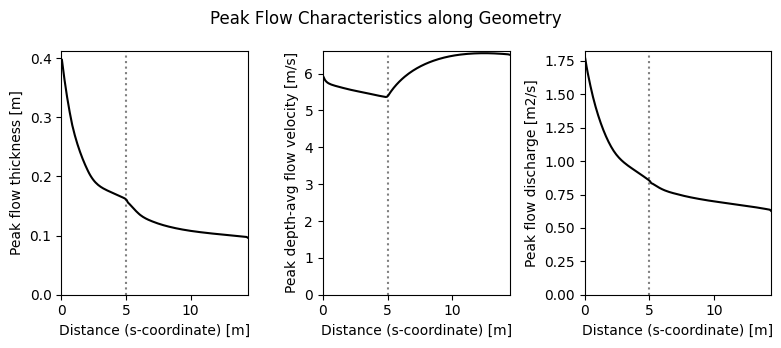

In [12]:
# Plot peak flow velocity, peak flow thickness, peak flow discharge
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=[8, 3.5])

# Mark the transition between the crest and landward slope
[ax.axvline(5.0, color="grey", ls=":") for ax in [ax0, ax1, ax2]]

# Get results and plot peak flow characteristics
h, u, q = results.get_peak_flow()
ax0.plot(results.s, h, color="black")
ax1.plot(results.s, u, color="black")
ax2.plot(results.s, q, color="black")

# Plot layout
[ax.set_xlabel("Distance (s-coordinate) [m]") for ax in [ax0, ax1, ax2]]
ax0.set_ylabel("Peak flow thickness [m]")
ax1.set_ylabel("Peak depth-avg flow velocity [m/s]")
ax2.set_ylabel("Peak flow discharge [m2/s]")
[ax.set_xlim(0, np.max(results.s)) for ax in [ax0, ax1, ax2]]
[ax.set_ylim(0, None) for ax in [ax0, ax1, ax2]]
fig.suptitle("Peak Flow Characteristics along Geometry")
fig.tight_layout()
plt.show()

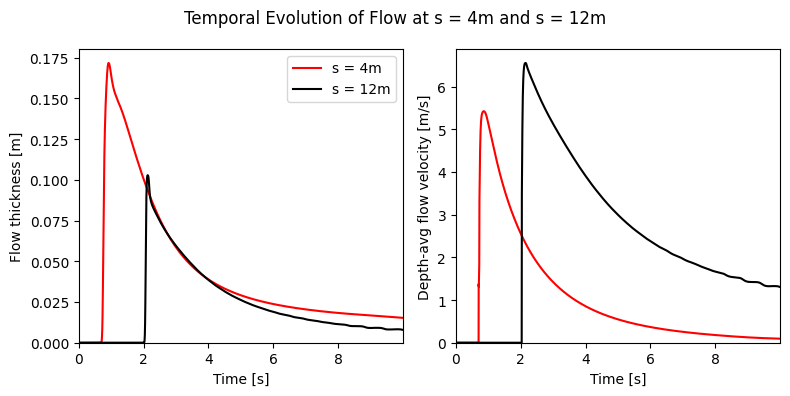

In [19]:
# Plot
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=[8, 4])

# Get and plot the flow at s=12m
res_t, res_h, res_u = results.get_st(s=4.0)
ax0.plot(res_t, res_h, color="red", label="s = 4m")
ax1.plot(res_t, res_u, color="red")

# Get and plot the flow at s=12m
res_t, res_h, res_u = results.get_st(s=12.0)
ax0.plot(res_t, res_h, color="black", label="s = 12m")
ax1.plot(res_t, res_u, color="black")

# Plot layout
ax0.legend()
[ax.set_xlabel("Time [s]") for ax in [ax0, ax1]]
ax0.set_ylabel("Flow thickness [m]")
ax1.set_ylabel("Depth-avg flow velocity [m/s]")
[ax.set_xlim(0, np.max(res_t)) for ax in [ax0, ax1]]
[ax.set_ylim(0, None) for ax in [ax0, ax1]]
fig.suptitle("Temporal Evolution of Flow at s = 4m and s = 12m")
fig.tight_layout()
plt.show()